In [13]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import scipy.linalg as lng
import matplotlib
from sklearn.cluster import KMeans
import operator
%matplotlib qt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import statsmodels.formula.api as smf
import statsmodels.api as sm
import mord
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import random
import copy
import math
from sklearn.tree import export_graphviz
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pydot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
def center(X):
    """ Center the columns (variables) of a data matrix to zero mean.
        
        X, MU = center(X) centers the observations of a data matrix such that each variable
        (column) has zero mean and also returns a vector MU of mean values for each variable.
     """ 
    n = X.shape[0]
    mu = np.mean(X,0)
    #X = X - np.ones((n,1)) * mu
    X = X - mu
    
    return X, mu

In [3]:
def normalize(X):
    """Normalize the columns (variables) of a data matrix to unit Euclidean length.
    X, MU, D = normalize(X)
    i) centers and scales the observations of a data matrix such
    that each variable (column) has unit Euclidean length. For a normalized matrix X,
    X'*X is equivalent to the correlation matrix of X.
    ii) returns a vector MU of mean values for each variable.
    iii) returns a vector D containing the Euclidean lengths for each original variable.
    
    """

    n = np.size(X, 0)
    X, mu = center(X)
    d = np.linalg.norm(X, ord = 2, axis = 0)
    d[np.where(d==0)] = 1
    X = np.divide(X, np.ones((n,1)) * d)
    return X, mu, d

In [7]:
data = pd.read_excel(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Data\Subject_Block_Session_Trial.xlsx')

data.dropna(subset=['ScoreDifficulty'], inplace=True, axis=0) # drop only nan in ScoreDifficulty
Y1_wNanInData = np.array(data.ScoreDifficulty.tolist())


data_woNa = data.dropna(inplace=False, axis=0) # drop nan values in all data
Y1 = data_woNa.ScoreDifficulty.tolist() # Y corresponding to data

#Y = [int(item) for item in Y]

#X = data.drop(['ScoreDifficulty'], axis = 1)

# drop some variables that are higher correlated to some other variables
data_new = data_woNa.drop(['PupilAbsolute_Median', 'BlinkCount', 'PupilRelative_Median', 'Subject', 'EffectiveTime'], axis=1)


# convert some data to categorical first
cols_categorical = ['SubjectID', 'BlockID', 'TypingTechniqueID', 'Session', 'Trial', 'ScoreDifficulty']
for cols in cols_categorical:
    data_new[cols] = data_new[cols].astype('category')

X = data_new.drop(['ScoreDifficulty', 'SubjectID', 'Block', 'BlockID', 'TypingTechnique', 'TypingTechniqueID', 'Session', \
                   'SessionDifficulty', 'Trial', 'BlinkDurationTotal'], axis = 1)
#X.drop(['ScoreDifficulty'], axis=1, inplace=True)

X_norm, mu, d = normalize(X)

X_exptDesign = data_new.drop(['Block', 'TypingTechnique', 'SessionDifficulty', 'TypingTechniqueID',
       'TotalTime', 'ScoreDifficulty', 'Session', 'Trial',
       'TypingSpeed', 'ErrorRate', 'PupilAbsolute_Mean',
       #'PupilAbsolute_Median',
       'PupilDifference_StartingEnding',
       'PupilRelative_Mean', #'PupilRelative_Median',
       'PupilRelative_Start', 'LHIPA', #'BlinkCount',
       'BlinkFrequency', 'BlinkDurationTotal', 'BlinkDurationAverage'], axis=1)

X_norm_all = pd.concat([X_norm, X_exptDesign], axis=1)


In [8]:
# create X with missing data
data_wNa = data.drop(['PupilAbsolute_Median', 'BlinkCount', 'PupilRelative_Median', 'Subject', 'EffectiveTime'], inplace=False, axis=1)

# convert some data to categorical first
cols_categorical = ['SubjectID', 'BlockID', 'TypingTechniqueID', 'Session', 'Trial', 'ScoreDifficulty']
for cols in cols_categorical:
    data_wNa[cols] = data_wNa[cols].astype('category')

X_wNa = data_wNa.drop(['ScoreDifficulty', 'SubjectID', 'Block', 'BlockID', 'TypingTechnique', 'TypingTechniqueID', 'Session', \
                   'SessionDifficulty', 'Trial', 'BlinkDurationTotal'], axis = 1)
#X.drop(['ScoreDifficultyNew'], axis=1, inplace=True)

X_wNa_norm, mu, d = normalize(X_wNa)

X_wNa_exptDesign = data_new.drop(['Block', 'TypingTechnique', 'SessionDifficulty',
       'TotalTime', 'ScoreDifficulty',
       'TypingSpeed', 'ErrorRate', 'PupilAbsolute_Mean',
       #'PupilAbsolute_Median',
       'PupilDifference_StartingEnding',
       'PupilRelative_Mean', #'PupilRelative_Median',
       'PupilRelative_Start', 'LHIPA', #'BlinkCount',
       'BlinkFrequency', 'BlinkDurationTotal', 'BlinkDurationAverage'], axis=1)


X_wNa_norm_all = pd.concat([X_wNa_norm, X_wNa_exptDesign], axis=1)



In [9]:
X.shape, X_wNa_norm.shape

((843, 10), (857, 10))

In [10]:
from sklearn import preprocessing, metrics

le = preprocessing.LabelEncoder()
le.fit(Y1)
le.classes_
Y = le.transform(Y1)


le = preprocessing.LabelEncoder()
le.fit(Y1_wNanInData)
le.classes_
Y_wNanInData = le.transform(Y1_wNanInData)

X_norm_wY = copy.deepcopy(X_norm)
X_norm_wY['y'] = Y

## PCA

In [11]:
n, p = np.shape(X_norm)
u, d, v = np.linalg.svd(X_norm)

# Plot the two components and see if the perceived difficulty levels are differentiated
L = v # the loading
k = len(d)
d = d[0:k]
u = u[:, :k]
v = v[:k, :] # Matrix that is returned from svd is ordered differently, therefor different slicing

S = np.matmul(u, np.diag(d)) # The scores


(0, 105)

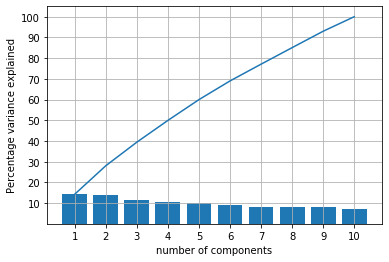

In [12]:
d_varianceExplained = list()
# Plot the variance explained by n components:

plt.figure()
plt.bar(range(1, len(d)+1), (d/sum(d))*100)

for i in range(1, len(d)+1):
    #print(len(d[0:i]), (sum(d[0:i])/sum(d))*100)
    d_varianceExplained.append((sum(d[0:i])/sum(d))*100)

plt.grid(b=True)
#d_varianceExplained = (d[0]/sum(d))*100
plt.plot(range(1, len(d)+1), d_varianceExplained)
plt.xlabel('number of components')
plt.ylabel('Percentage variance explained')
plt.xticks(range(1,len(d)+1))
plt.yticks(range(10,110,10))
plt.ylim([0,105])

In [51]:
d_varianceExplained

[14.281212432328005,
 28.027008719145403,
 39.41654406692184,
 49.9243926225861,
 59.96524183256816,
 68.98713052453857,
 77.08534938637862,
 85.06470620097203,
 92.99209085591073,
 100.0]

In [20]:

# for perceived score of 1, plot pc2 vs pc1:
#colorList = ['b', 'r', 'y', 'c', 'm', 'pink', 'g']

indices = Y==0
plt.figure(figsize=(12, 9))
plt.plot(S[indices, 0], S[indices, 1], 'ob', label=0)

indices = Y==6
plt.plot(S[indices, 0], S[indices, 1], 'or', label=6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#for i in range(1,8):
#    indices = Y==i
#    plt.plot(S[indices, 1], S[indices,0], 'o', markerfacecolor=colorList[i-1], markeredgecolor=colorList[i-1], label=i)
plt.rcParams.update({'font.size': 24})
plt.legend()
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\PCA\PC1_PC2', dpi=600)


In [53]:
# Scree plot
sigma2 = d ** 2 / sum(d**2)
plt.figure()
plt.plot(range(1,len(d)+1), sigma2, '-ob')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.title('Scree plot')

Text(0.5, 1.0, 'Scree plot')

In [21]:
# Biplot and factor loadings
xs = S[:,0]
ys = S[:,1]
coeff = np.transpose(v[0:2,:])
n = coeff.shape[0]

scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.figure(figsize=(12, 9))
plt.scatter(xs * scalex,ys * scaley, c = Y, alpha=0.5)
plt.colorbar()

for i in range(n):
    
    label_ = 'Var'+str(i+1)+' : '+X_norm.columns[i]
    print(label_)
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 1)
    plt.text(coeff[i,0]*1.3, coeff[i,1]*1.5, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
    
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)

plt.grid()
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\PCA\loadings', dpi=600)

Var1 : TotalTime
Var2 : TypingSpeed
Var3 : ErrorRate
Var4 : PupilAbsolute_Mean
Var5 : PupilDifference_StartingEnding
Var6 : PupilRelative_Mean
Var7 : PupilRelative_Start
Var8 : LHIPA
Var9 : BlinkFrequency
Var10 : BlinkDurationAverage


In [21]:
coeff

array([[ 0.3187771 , -0.24961413],
       [-0.30051223,  0.32577782],
       [ 0.1881157 , -0.25081813],
       [-0.3730992 , -0.41700562],
       [-0.38317493, -0.36270558],
       [-0.25415364, -0.02552506],
       [-0.37594508, -0.38693076],
       [-0.3049354 ,  0.3794124 ],
       [ 0.32307256, -0.4025413 ],
       [ 0.28873821,  0.0827202 ]])

In [22]:
# Obtain the new data from PCA components:
X_PCA = pd.DataFrame.from_records(S, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',\
                                              'PC10'])

# Metrics to compare models

In [23]:
maeTrainMean, maeTrainStd, maeTestMean, maeTestStd = dict(), dict(), dict(), dict()

# REGRESSION

# OLS
using statsmodel

## Complete model

In [24]:
skf = StratifiedKFold(n_splits=10)

maeTrain_ols_complData, maeTest_ols_complData = list(), list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_norm_all.iloc[train_index], X_norm_all.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    model = smf.ols('y_train ~ TotalTime + TypingSpeed + ErrorRate + PupilAbsolute_Mean + PupilDifference_StartingEnding\
    + PupilRelative_Mean + PupilRelative_Start + LHIPA + BlinkFrequency + BlinkDurationAverage +\
    SubjectID + BlockID', data=X_train)
    model = model.fit(cov_type='HC3')
    #print(model.summary())

    X_train = sm.add_constant(X_train)
    y_predTrain = model.predict(X_train)
    maeTrain_ols_complData.append(metrics.mean_absolute_error(y_predTrain, y_train))
    
    X_test = sm.add_constant(X_test)
    y_predTest = model.predict(X_test)
    maeTest_ols_complData.append(metrics.mean_absolute_error(y_predTest, y_test))    
    
    
maeTrainMean['ols_complData'] = np.mean(maeTrain_ols_complData)
maeTrainStd['ols_complData']= np.std(maeTrain_ols_complData)

maeTestMean['ols_complData'] = np.mean(maeTest_ols_complData)
maeTestStd['ols_complData']= np.std(maeTest_ols_complData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_ols_complData), 'with std: ', np.std(maeTrain_ols_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_ols_complData), 'with std: ', np.std(maeTest_ols_complData))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

TRAINING DATA
Mean of mean absolute error 0.7711140577553747 with std:  0.00952190767566444

TESTING DATA
Mean of mean absolute error 0.8701343894540405 with std:  0.09229090188613936


## Reduced model

In [105]:
model = smf.ols('Y ~ TotalTime + TypingSpeed + ErrorRate + BlinkFrequency + SubjectID + BlockID', data=X_norm_all)
model = model.fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     79.95
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          5.65e-200
Time:                        16:49:16   Log-Likelihood:                -1175.1
No. Observations:                 843   AIC:                             2402.
Df Residuals:                     817   BIC:                             2525.
Df Model:                          25                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6265      0.15

In [25]:
# cross-validation for Linear regression on pDiff using leave-one-subject-out using OLS

skf = StratifiedKFold(n_splits=10)

maeTrain_ols_redData, maeTest_ols_redData = list(), list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train = X_norm_all.iloc[train_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_test = X_norm_all[['TotalTime', 'TypingSpeed', 'ErrorRate', 'BlinkFrequency', 'SubjectID', \
                         'BlockID']].iloc[test_index]
    
    model = smf.ols('y_train ~ TotalTime + TypingSpeed + ErrorRate + BlinkFrequency + SubjectID + BlockID', data=X_train)
    model = model.fit(cov_type='HC3')
    #print(model.summary())
    
    X_train = sm.add_constant(X_train)
    y_predTrain = model.predict(X_train)
    maeTrain_ols_redData.append(metrics.mean_absolute_error(y_predTrain, y_train))
    
    X_test = sm.add_constant(X_test)
    y_predTest = model.predict(X_test)
    maeTest_ols_redData.append(metrics.mean_absolute_error(y_predTest, y_test))    
    
    
maeTrainMean['ols_redData'] = np.mean(maeTrain_ols_redData)
maeTrainStd['ols_redData']= np.std(maeTrain_ols_redData)

maeTestMean['ols_redData'] = np.mean(maeTest_ols_redData)
maeTestStd['ols_redData']= np.std(maeTest_ols_redData)

    
print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_ols_redData), 'with std: ', np.std(maeTrain_ols_redData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_ols_redData), 'with std: ', np.std(maeTest_ols_redData))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

TRAINING DATA
Mean of mean absolute error 0.7740658096716413 with std:  0.008633504130295398

TESTING DATA
Mean of mean absolute error 0.8674425523661522 with std:  0.08938294390358462


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Linear regression on PCA_data

In [26]:
# Linear regression on pDiff using OLS on PCA data

# cross-validation for Linear regression on pDiff using leave-one-subject-out using OLS

skf = StratifiedKFold(n_splits=10)

maeTrain_ols_pcaData, maeTest_ols_pcaData = list(), list()

for train_index, test_index in skf.split(X_PCA, Y):
    
    
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    model = smf.ols('y_train ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data = X_train)
    model = model.fit(cov_type='HC3')
    
    
    X_train = sm.add_constant(X_train)
    y_predTrain = model.predict(X_train)
    maeTrain_ols_pcaData.append(metrics.mean_absolute_error(y_predTrain, y_train))
    
    X_test = sm.add_constant(X_test)
    y_predTest = model.predict(X_test)
    maeTest_ols_pcaData.append(metrics.mean_absolute_error(y_predTest, y_test))    
    
    
maeTrainMean['ols_pcaData'] = np.mean(maeTrain_ols_pcaData)
maeTrainStd['ols_pcaData']= np.std(maeTrain_ols_pcaData)

maeTestMean['ols_pcaData'] = np.mean(maeTest_ols_pcaData)
maeTestStd['ols_pcaData']= np.std(maeTest_ols_pcaData)

    
print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_ols_pcaData), 'with std: ', np.std(maeTrain_ols_pcaData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_ols_pcaData), 'with std: ', np.std(maeTest_ols_pcaData))
    


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

TRAINING DATA
Mean of mean absolute error 0.9568265160092728 with std:  0.014667824166014956

TESTING DATA
Mean of mean absolute error 0.9956352021110394 with std:  0.1221531154053402


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Reduced data

In [27]:
X_norm_allReduced = X_norm_all.drop(['PupilAbsolute_Mean', \
'PupilDifference_StartingEnding', 'PupilRelative_Mean', 'LHIPA', \
'BlinkDurationAverage', 'PupilRelative_Start'], axis=1)

X_normReduced = X_norm.drop(['PupilAbsolute_Mean', \
'PupilDifference_StartingEnding', 'PupilRelative_Mean', 'LHIPA', \
'BlinkDurationAverage', 'PupilRelative_Start'], axis=1)

In [28]:
X_norm_allReduced.head()

,TotalTime,TypingSpeed,ErrorRate,BlinkFrequency,SubjectID,BlockID
0,-0.016127,-0.006768,-0.029719,0.068978,1.0,1.0
1,-0.024759,-0.015421,-0.029719,0.046282,1.0,1.0
2,-0.037566,-0.007165,-0.009149,0.023133,1.0,1.0
3,-0.016004,-0.004969,-0.021707,0.048643,1.0,1.0
4,-0.036926,0.012007,-0.029719,0.019890,1.0,1.0


## Random Forests 
Model optimization

## On complete data

In [29]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'max_features' : (4,5,6,7,8,9,10)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                max_features=best_params["max_features"], random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [114]:
scores_rfr, bestParams_rfr = rfr_model(X_norm, Y)
print('Neg_mean_absolute error: ', np.mean(scores_rfr), np.std(scores_rfr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 7, 'n_estimators': 500}
Neg_mean_absolute error:  -1.0235573573138435 0.13534770388347003


In [117]:
# Plot oob error
maeOOBList = list()

plt.figure(figsize=(12,9))

for j, nTrees in enumerate([20, 50, 100, 200, 300, 500, 700, 1000]):
    maeOOBList = list()
    
    for train_index, test_index in skf.split(X_norm, Y):
    
        X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        rf = RandomForestRegressor(max_depth=6, n_estimators=nTrees,
                                   max_features=7, random_state=False, verbose=False, 
                                   oob_score=True)
        
        
        #rf = RandomForestRegressor(max_depth=bestParams_rfr["max_depth"], n_estimators=nTrees,
        #                           max_features=bestParams_rfr["max_features"], random_state=False, verbose=False, 
        #                           oob_score=True)
        # Train the model on training data
        rf.fit(X_train, y_train)
    
        # Use out-of-bag prediction scores to estimate the number of trees
        maeOOBList.append(1-(rf.oob_score_))
        
    plt.boxplot(maeOOBList, positions=[j+1])
        
plt.xlabel('Number of trees')
plt.ylabel('Out of bag error')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], [20, 50, 100, 200, 300, 500, 700, 1000])
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\Random Forests\oobError_modelSelection', dpi=600)

Variable importance

In [35]:
perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)

imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': perm.feature_importances_})

# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)

## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

plt.figure(figsize=(12,9))
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Feature importance")

plt.tight_layout()
# Show graphic
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\Random Forests\variable_importance', dpi=600)


In [115]:
skf = StratifiedKFold(n_splits=10)

maeTrain_rf_complData, maeTest_rf_complData = list(), list()
accuracy_rf_complData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    rf = RandomForestRegressor(max_depth=bestParams_rfr["max_depth"], n_estimators=bestParams_rfr["n_estimators"],
                                max_features=bestParams_rfr["max_features"], random_state=False, verbose=False)
    # Train the model on training data
    rf.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_rf_complData.append(1-(rf.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_rf_complData.append(1-(rf.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = rf.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_rf_complData.append(accuracy)    
    

maeTrainMean['rf_complData'] = np.mean(maeTrain_rf_complData)
maeTrainStd['rf_complData']= np.std(maeTrain_rf_complData)

maeTestMean['rf_complData'] = np.mean(maeTest_rf_complData)
maeTestStd['rf_complData']= np.std(maeTest_rf_complData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_rf_complData), 'with std: ', np.std(maeTrain_rf_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_rf_complData), 'with std: ', np.std(maeTest_rf_complData))
print('Mean accuracy: ', np.mean(accuracy_rf_complData), 'with std: ', np.std(accuracy_rf_complData))

TRAINING DATA
Mean of mean absolute error 0.22906592396235767 with std:  0.008555950656215035

TESTING DATA
Mean of mean absolute error 0.4600874752675206 with std:  0.10043159865384868
Mean accuracy:  65.96519584913061 with std:  4.570615104290552


## On Reduced data

In [107]:
def rfr_model_reduced(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'max_features' : (1,2,3,4)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                max_features=best_params["max_features"], random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [39]:
scores_rfr_reduced, bestParams_rfr_reduced = rfr_model_reduced(X_normReduced, Y)
print('Neg_mean_absolute error: ', np.mean(scores_rfr_reduced), np.std(scores_rfr_reduced))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 2, 'n_estimators': 50}
Neg_mean_absolute error:  -1.0320243290350424 0.14248870308992692


In [108]:
skf = StratifiedKFold(n_splits=10)

maeTrain_rf_redData, maeTest_rf_redData = list(), list()
accuracy_rf_redData = list()

nFeatures = min(bestParams_rfr["max_features"], len(X_normReduced.columns))
                
for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_normReduced.iloc[train_index], X_normReduced.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    rf = RandomForestRegressor(max_depth=bestParams_rfr_reduced["max_depth"], 
                               n_estimators=bestParams_rfr_reduced["n_estimators"],
                               max_features=bestParams_rfr_reduced["max_features"], random_state=False, verbose=False)
    # Train the model on training data
    rf.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_rf_redData.append(1-(rf.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_rf_redData.append(1-(rf.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = rf.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_rf_redData.append(accuracy)    
    

maeTrainMean['rf_redData'] = np.mean(maeTrain_rf_redData)
maeTrainStd['rf_redData']= np.std(maeTrain_rf_redData)

maeTestMean['rf_redData'] = np.mean(maeTest_rf_redData)
maeTestStd['rf_redData']= np.std(maeTest_rf_redData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_rf_redData), 'with std: ', np.std(maeTrain_rf_redData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_rf_redData), 'with std: ', np.std(maeTest_rf_redData))
print('Mean accuracy: ', np.mean(accuracy_rf_redData), 'with std: ', np.std(accuracy_rf_redData))

optimized parameters:  {'max_depth': 5, 'max_features': 2, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 3, 'n_estimators': 20}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 2, 'n_estimators': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 3, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 3, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 2, 'n_estimators': 20}
optimized parameters:  {'max_depth': 6, 'max_features': 2, 'n_estimators': 50}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 4, 'max_features': 3, 'n_estimators': 50}
optimized parameters:  {'max_depth': 4, 'max_features': 4, 'n_estimators': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 3, 'n_estimators': 1000}
TRAINING DATA
Mean of mean absolute error 0.3340580946717558 with std:  0.029041114162071217

TESTING DATA
Mean of mean absolute error 0.4895547368654203 with std:  0.10845865457693213
Mean accuracy:  65.35671361148758 with std:  4.484123078804191


# On PCA data

In [43]:
def rfr_model_pca(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'max_features' :(4,5,6,7,8,9,10)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                max_features=best_params["max_features"], random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [44]:
scores_rfr_pca, bestParams_rfr_pca = rfr_model_pca(X_PCA, Y)
print('Neg_mean_absolute error: ', np.mean(scores_rfr_pca), np.std(scores_rfr_pca))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 500}
Neg_mean_absolute error:  -1.0942529527969431 0.1498015283435986


In [109]:
skf = StratifiedKFold(n_splits=10)

maeTrain_rf_pcaData, maeTest_rf_pcaData = list(), list()
accuracy_rf_pcaData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    scores_rfr_pca, bestParams_rfr_pca = rfr_model_pca(X_train, y_train)
    
    rf = RandomForestRegressor(max_depth=bestParams_rfr_pca["max_depth"], n_estimators=bestParams_rfr_pca["n_estimators"],
                                max_features=bestParams_rfr_pca["max_features"], random_state=False, verbose=False)
    # Train the model on training data
    rf.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_rf_pcaData.append(1-(rf.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_rf_pcaData.append(1-(rf.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = rf.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_rf_pcaData.append(accuracy)    

    
maeTrainMean['rf_pcaData'] = np.mean(maeTrain_rf_pcaData)
maeTrainStd['rf_pcaData']= np.std(maeTrain_rf_pcaData)

maeTestMean['rf_pcaData'] = np.mean(maeTest_rf_pcaData)
maeTestStd['rf_pcaData']= np.std(maeTest_rf_pcaData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_rf_pcaData), 'with std: ', np.std(maeTrain_rf_pcaData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_rf_pcaData), 'with std: ', np.std(maeTest_rf_pcaData))
print('Mean accuracy: ', np.mean(accuracy_rf_pcaData), 'with std: ', np.std(accuracy_rf_pcaData))

optimized parameters:  {'max_depth': 6, 'max_features': 5, 'n_estimators': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 500}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 6, 'n_estimators': 50}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 300}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 5, 'n_estimators': 100}
optimized parameters:  {'max_depth': 6, 'max_features': 5, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 700}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 6, 'max_features': 4, 'n_estimators': 700}
TRAINING DATA
Mean of mean absolute error 0.25127069332422836 with std:  0.010076387055002559

TESTING DATA
Mean of mean absolute error 0.5028369663975583 with std:  0.10952769273179158
Mean accuracy:  61.4411574658367 with std:  3.9478342467372913


# Decision Tree

model selection

## On complete data

In [46]:
def dtr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(criterion='mae', ),
        param_grid={
            'max_depth': range(3,7),
            'max_features' : (4,5,6,7,8,9,10)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    dtr = DecisionTreeRegressor(max_depth=best_params["max_depth"], max_features=best_params["max_features"],
                                criterion='mae', 
                                random_state=False)
    # Perform K-Fold CV
    scores = cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [47]:
scores_dtr, bestParams_dtr = dtr_model(X_norm, Y)
print('Neg_mean_absolute error: ', np.mean(scores_dtr), np.std(scores_dtr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 8}
Neg_mean_absolute error:  -1.1057633053221287 0.17143324576319816


In [49]:
skf = StratifiedKFold(n_splits=10)

maeTrain_decTree_complData, maeTest_decTree_complData = list(), list()
accuracy_decTree_complData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    regr = DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr['max_depth'], 
                                 max_features=bestParams_dtr["max_features"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_decTree_complData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_decTree_complData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_decTree_complData.append(accuracy)    
    

maeTrainMean['decTree_complData'] = np.mean(maeTrain_decTree_complData)
maeTrainStd['decTree_complData']= np.std(maeTrain_decTree_complData)

maeTestMean['decTree_complData'] = np.mean(maeTest_decTree_complData)
maeTestStd['decTree_complData']= np.std(maeTest_decTree_complData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_decTree_complData), 'with std: ', np.std(maeTrain_decTree_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_decTree_complData), 'with std: ', np.std(maeTest_decTree_complData))
print('Mean accuracy: ', np.mean(accuracy_decTree_complData), 'with std: ', np.std(accuracy_decTree_complData))

TRAINING DATA
Mean of mean absolute error 0.3896850327040512 with std:  0.013926905043341181

TESTING DATA
Mean of mean absolute error 0.6682990145186316 with std:  0.14241015878593755
Mean accuracy:  63.85969168566821 with std:  5.045906566144584


## On reduced data

In [50]:
def dtr_model_red(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(criterion='mae', ),
        param_grid={
            'max_depth': range(3,7),
            'max_features' : (1,2,3,4)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    dtr = DecisionTreeRegressor(max_depth=best_params["max_depth"], max_features=best_params["max_features"],
                                criterion='mae', 
                                random_state=False)
    # Perform K-Fold CV
    scores = cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [51]:
scores_dtr_red, bestParams_dtr_red = dtr_model_red(X_normReduced, Y)
print('Neg_mean_absolute error: ', np.mean(scores_dtr_red), np.std(scores_dtr_red))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 5, 'max_features': 4}
Neg_mean_absolute error:  -1.1131022408963585 0.2057053285561849


In [52]:
skf = StratifiedKFold(n_splits=10)

maeTrain_decTree_redData, maeTest_decTree_redData = list(), list()
accuracy_decTree_redData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_normReduced.iloc[train_index], X_normReduced.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    regr = DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr_red['max_depth'], 
                                 max_features=bestParams_dtr_red["max_features"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_decTree_redData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_decTree_redData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_decTree_redData.append(accuracy)    
    

maeTrainMean['decTree_redData'] = np.mean(maeTrain_decTree_redData)
maeTrainStd['decTree_redData']= np.std(maeTrain_decTree_redData)

maeTestMean['decTree_redData'] = np.mean(maeTest_decTree_redData)
maeTestStd['decTree_redData']= np.std(maeTest_decTree_redData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_decTree_redData), 'with std: ', np.std(maeTrain_decTree_redData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_decTree_redData), 'with std: ', np.std(maeTest_decTree_redData))
print('Mean accuracy: ', np.mean(accuracy_decTree_redData), 'with std: ', np.std(accuracy_decTree_redData))

TRAINING DATA
Mean of mean absolute error 0.4044285134982915 with std:  0.018730387237539333

TESTING DATA
Mean of mean absolute error 0.6011691891370963 with std:  0.14950524039250193
Mean accuracy:  66.96824310458507 with std:  5.476058842136069


## On PCA data

In [53]:
def dtr_model_pca(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(criterion='mae', ),
        param_grid={
            'max_depth': range(3,7),
            'max_features' : (4,5,6,7,8,9,10)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    dtr = DecisionTreeRegressor(max_depth=best_params["max_depth"], max_features=best_params["max_features"],
                                criterion='mae', 
                                random_state=False)
    # Perform K-Fold CV
    scores = cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [54]:
scores_dtr_pca, bestParams_dtr_pca = dtr_model_pca(X_PCA, Y)
print('Neg_mean_absolute error: ', np.mean(scores_dtr_pca), np.std(scores_dtr_pca))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'max_depth': 4, 'max_features': 9}
Neg_mean_absolute error:  -1.1653991596638655 0.1362809814835891


In [55]:
skf = StratifiedKFold(n_splits=10)

maeTrain_decTree_pcaData, maeTest_decTree_pcaData = list(), list()
accuracy_decTree_pcaData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    regr = DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr_pca['max_depth'], 
                                 max_features=bestParams_dtr_pca["max_features"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_decTree_pcaData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_decTree_pcaData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_decTree_pcaData.append(accuracy)    
    

maeTrainMean['decTree_pcaData'] = np.mean(maeTrain_decTree_pcaData)
maeTrainStd['decTree_pcaData']= np.std(maeTrain_decTree_pcaData)

maeTestMean['decTree_pcaData'] = np.mean(maeTest_decTree_pcaData)
maeTestStd['decTree_pcaData']= np.std(maeTest_decTree_pcaData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_decTree_pcaData), 'with std: ', np.std(maeTrain_decTree_pcaData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_decTree_pcaData), 'with std: ', np.std(maeTest_decTree_pcaData))
print('Mean accuracy: ', np.mean(accuracy_decTree_pcaData), 'with std: ', np.std(accuracy_decTree_pcaData))

TRAINING DATA
Mean of mean absolute error 0.5015223613563137 with std:  0.02050002204457306

TESTING DATA
Mean of mean absolute error 0.7690044368826843 with std:  0.22563416252340418
Mean accuracy:  57.96089911636848 with std:  7.065980816365375


# Adaboosting with Decision Trees

Model selection

# On complete data

In [56]:
def ab_model(X, y, bestParams_dtr):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=AdaBoostRegressor(),
        param_grid={
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'loss' : ['linear', 'square', 'exponential']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=bestParams_dtr["max_depth"], 
                           max_features=bestParams_dtr["max_features"], criterion='mae', random_state=False), 
                           n_estimators=best_params["n_estimators"])
    # Perform K-Fold CV
    scores = cross_val_score(ab, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [57]:
scores_ab, bestParams_ab = ab_model(X_norm, Y, bestParams_dtr)
print('Neg_mean_absolute error: ', np.mean(scores_ab), np.std(scores_ab))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'loss': 'exponential', 'n_estimators': 20}
Neg_mean_absolute error:  -1.0277661064425767 0.14216965435542822


In [59]:
skf = StratifiedKFold(n_splits=10)

maeTrain_adaBoost_complData, maeTest_adaBoost_complData = list(), list()
accuracy_adaBoost_complData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    #regr = DecisionTreeRegressor(max_depth=3)
    regr = AdaBoostRegressor(DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr['max_depth'], 
                                 max_features=bestParams_dtr["max_features"]), n_estimators=bestParams_ab['n_estimators'],
                            loss = bestParams_ab["loss"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_adaBoost_complData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_adaBoost_complData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_adaBoost_complData.append(accuracy)    
    

maeTrainMean['adaBoost_complData'] = np.mean(maeTrain_adaBoost_complData)
maeTrainStd['adaBoost_complData']= np.std(maeTrain_adaBoost_complData)

maeTestMean['adaBoost_complData'] = np.mean(maeTest_adaBoost_complData)
maeTestStd['adaBoost_complData']= np.std(maeTest_adaBoost_complData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_adaBoost_complData), 'with std: ', np.std(maeTrain_adaBoost_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_adaBoost_complData), 'with std: ', np.std(maeTest_adaBoost_complData))
print('Mean accuracy: ', np.mean(accuracy_adaBoost_complData), 'with std: ', np.std(accuracy_adaBoost_complData))

TRAINING DATA
Mean of mean absolute error 0.22976037772272898 with std:  0.010112797992370947

TESTING DATA
Mean of mean absolute error 0.5166087981398905 with std:  0.09558212017147373
Mean accuracy:  66.05705960678017 with std:  4.349315283596647


# On reduced data

In [60]:
def ab_model_red(X, y, bestParams_dtr_red):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=AdaBoostRegressor(),
        param_grid={
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'loss' : ['linear', 'square', 'exponential']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=bestParams_dtr_red["max_depth"], 
                           max_features=bestParams_dtr_red["max_features"], criterion='mae', random_state=False), 
                           n_estimators=best_params["n_estimators"])
    # Perform K-Fold CV
    scores = cross_val_score(ab, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [61]:
scores_ab_red, bestParams_ab_red = ab_model_red(X_normReduced, Y, bestParams_dtr_red)
print('Neg_mean_absolute error: ', np.mean(scores_ab_red), np.std(scores_ab_red))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'loss': 'linear', 'n_estimators': 50}
Neg_mean_absolute error:  -1.0694257703081234 0.15285888809356493


In [63]:
skf = StratifiedKFold(n_splits=10)

maeTrain_adaBoost_redData, maeTest_adaBoost_redData = list(), list()
accuracy_adaBoost_redData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_normReduced.iloc[train_index], X_normReduced.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    #regr = DecisionTreeRegressor(max_depth=3)
    regr = AdaBoostRegressor(DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr_red['max_depth'], 
                             max_features=bestParams_dtr_red["max_features"]), 
                             n_estimators=bestParams_ab_red['n_estimators'], loss=bestParams_ab_red["loss"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_adaBoost_redData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_adaBoost_redData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_adaBoost_redData.append(accuracy)    
    

maeTrainMean['adaBoost_redData'] = np.mean(maeTrain_adaBoost_redData)
maeTrainStd['adaBoost_redData']= np.std(maeTrain_adaBoost_redData)

maeTestMean['adaBoost_redData'] = np.mean(maeTest_adaBoost_redData)
maeTestStd['adaBoost_redData']= np.std(maeTest_adaBoost_redData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_adaBoost_redData), 'with std: ', np.std(maeTrain_adaBoost_redData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_adaBoost_redData), 'with std: ', np.std(maeTest_adaBoost_redData))
print('Mean accuracy: ', np.mean(accuracy_adaBoost_redData), 'with std: ', np.std(accuracy_adaBoost_redData))

TRAINING DATA
Mean of mean absolute error 0.23212028112732322 with std:  0.009272217340505474

TESTING DATA
Mean of mean absolute error 0.5824717800415414 with std:  0.120513187611971
Mean accuracy:  63.5444002929557 with std:  5.297643074441898


# On PCA data

In [64]:
def ab_model_pca(X, y, bestParams_dtr_pca):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=AdaBoostRegressor(),
        param_grid={
            'n_estimators': (20, 50, 100, 200, 300, 500, 700, 1000),
            'loss' : ['linear', 'square', 'exponential']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print('optimized parameters: ', best_params)
    
    ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=bestParams_dtr_pca["max_depth"], 
                           max_features=bestParams_dtr_pca["max_features"], criterion='mae', random_state=False), 
                           n_estimators=best_params["n_estimators"])
    # Perform K-Fold CV
    scores = cross_val_score(ab, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, best_params

In [65]:
scores_ab_pca, bestParams_ab_pca = ab_model_pca(X_PCA, Y, bestParams_dtr_pca)
print('Neg_mean_absolute error: ', np.mean(scores_ab_pca), np.std(scores_ab_pca))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


optimized parameters:  {'loss': 'square', 'n_estimators': 300}
Neg_mean_absolute error:  -1.0592296918767508 0.17613301323439254


In [66]:
skf = StratifiedKFold(n_splits=10)

maeTrain_adaBoost_pcaData, maeTest_adaBoost_pcaData = list(), list()
accuracy_adaBoost_pcaData = list()

for train_index, test_index in skf.split(X_norm, Y):
    
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    #regr = DecisionTreeRegressor(max_depth=3)
    regr = AdaBoostRegressor(DecisionTreeRegressor(criterion='mae', max_depth=bestParams_dtr['max_depth'], 
                             max_features=bestParams_dtr["max_features"]), n_estimators=bestParams_ab['n_estimators'],
                             loss = bestParams_ab_pca["loss"])
    regr.fit(X_train, y_train)
    
    # Training data metrics:
    maeTrain_adaBoost_pcaData.append(1-(regr.score(X_train, y_train)))
    
    # testing data metrics:
    maeTest_adaBoost_pcaData.append(1-(regr.score(X_test, y_test)))
    # Use the forest's predict method on the test data
    test_pred = regr.predict(X_test)
    # Calculate the absolute errors
    errors = np.sqrt((test_pred - y_test)**2)    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / (y_test+1))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_adaBoost_pcaData.append(accuracy)    
    

maeTrainMean['adaBoost_pcaData'] = np.mean(maeTrain_adaBoost_pcaData)
maeTrainStd['adaBoost_pcaData']= np.std(maeTrain_adaBoost_pcaData)

maeTestMean['adaBoost_pcaData'] = np.mean(maeTest_adaBoost_pcaData)
maeTestStd['adaBoost_pcaData']= np.std(maeTest_adaBoost_pcaData)


print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_adaBoost_pcaData), 'with std: ', np.std(maeTrain_adaBoost_pcaData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_adaBoost_pcaData), 'with std: ', np.std(maeTest_adaBoost_pcaData))
print('Mean accuracy: ', np.mean(accuracy_adaBoost_pcaData), 'with std: ', np.std(accuracy_adaBoost_pcaData))

TRAINING DATA
Mean of mean absolute error 0.2324581451393691 with std:  0.011453111879473387

TESTING DATA
Mean of mean absolute error 0.5920453045733816 with std:  0.08053115075823052
Mean accuracy:  64.08558759423171 with std:  3.8537682463432845


# Training error bar plot

In [92]:
modelPlot_regr = ['ols', 'rf', 'decTree', 'adaBoost']
dataPlot = ['compl', 'red', 'pca']

trainingErrorMean_regr, trainingErrorStd_regr, testingErrorMean_regr, testingErrorStd_regr = list(), list(), list(), list()

trainingErrorMean_regr = [maeTrainMean[modelName + '_' + dataType + 'Data'] for modelName in modelPlot_regr for dataType in dataPlot]
trainingErrorStd_regr = [maeTrainStd[modelName + '_' + dataType + 'Data'] for modelName in modelPlot_regr for dataType in dataPlot]
testingErrorMean_regr = [maeTestMean[modelName + '_' + dataType + 'Data'] for modelName in modelPlot_regr for dataType in dataPlot]
testingErrorStd_regr = [maeTestStd[modelName + '_' + dataType + 'Data'] for modelName in modelPlot_regr for dataType in dataPlot]


In [111]:
x_ticks = [1,2,3,5,6,7,9,10,11,13,14,15]
plt.figure(figsize=(12,9))
for i, model in enumerate(modelPlot_regr):
    p1 = plt.bar(x_ticks[3*i], trainingErrorMean_regr[3*i], yerr = trainingErrorStd_regr[3*i], color ='b')
    p2 = plt.bar(x_ticks[3*i+1], trainingErrorMean_regr[3*i+1], yerr = trainingErrorStd_regr[3*i+1], color ='r')
    p3 = plt.bar(x_ticks[3*i+2], trainingErrorMean_regr[3*i+2], yerr = trainingErrorStd_regr[3*i+2], color ='g')

plt.ylim([0,1.3])
plt.xticks([2, 6, 10, 14], ['LR', 'RF', 'DT', 'Adaboost'])
plt.ylabel('Training error (Mean absolute error)')
plt.legend((p1, p2, p3), ('Complete data', 'Reduced data', 'PCA data'))
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\regression_trainingError', dpi=600)

In [113]:
x_ticks = [1,2,3,5,6,7,9,10,11,13,14,15]
plt.figure(figsize=(12,9))
for i, model in enumerate(modelPlot_regr):
    p1 = plt.bar(x_ticks[3*i], testingErrorMean_regr[3*i], yerr = testingErrorStd_regr[3*i], color ='b')
    p2 = plt.bar(x_ticks[3*i+1], testingErrorMean_regr[3*i+1], yerr = testingErrorStd_regr[3*i+1], color ='r')
    p3 = plt.bar(x_ticks[3*i+2], testingErrorMean_regr[3*i+2], yerr = testingErrorStd_regr[3*i+2], color ='g')

plt.ylim([0,1.3])
plt.xticks([2, 6, 10, 14], ['LR', 'RF', 'DT', 'Adaboost'])
plt.ylabel('Testing error (Mean absolute error)')
plt.legend((p1, p2, p3), ('Complete data', 'Reduced data', 'PCA data'))
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\regression_testingError', dpi=600)

# Transformation before linear modelling

In [84]:
# cross-validation for Linear regression on pDiff using leave-one-subject-out using OLS

model = smf.ols('Y ~ np.exp(TotalTime) + TypingSpeed + np.log(ErrorRate) + np.exp(BlinkFrequency) +\
    X_norm_all.SubjectID+X_norm_all.BlockID', data=X_norm)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.12
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           6.44e-43
Time:                        00:10:36   Log-Likelihood:                -455.99
No. Observations:                 307   AIC:                             964.0
Df Residuals:                     281   BIC:                             1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log


# CLASSIFICATION

metrics

In [75]:
f1ScoreTestMean, f1ScoreTestStd = dict(), dict()

## Ordinal Multiple Logistic regression
using minirank

In [76]:
from sklearn import metrics
from scipy import linalg, optimize, sparse
import numpy as np
import warnings

BIG = 1e10
SMALL = 1e-12


def phi(t):
    """
    logistic function, returns 1 / (1 + exp(-t))
    """
    idx = t > 0
    out = np.empty(t.size, dtype=np.float)
    out[idx] = 1. / (1 + np.exp(-t[idx]))
    exp_t = np.exp(t[~idx])
    out[~idx] = exp_t / (1. + exp_t)
    return out

def log_logistic(t):
    """
    (minus) logistic loss function, returns log(1 / (1 + exp(-t)))
    """
    idx = t > 0
    out = np.zeros_like(t)
    out[idx] = np.log(1 + np.exp(-t[idx]))
    out[~idx] = (-t[~idx] + np.log(1 + np.exp(t[~idx])))
    return out


def ordinal_logistic_fit(X, y, alpha=0, l1_ratio=0, n_class=None, max_iter=10000,
                         verbose=False, solver='TNC', w0=None):
    """
    Ordinal logistic regression or proportional odds model.
    Uses scipy's optimize.fmin_slsqp solver.
    Parameters
    ----------
    X : {array, sparse matrix}, shape (n_samples, n_feaures)
        Input data
    y : array-like
        Target values
    max_iter : int
        Maximum number of iterations
    verbose: bool
        Print convergence information
    Returns
    -------
    w : array, shape (n_features,)
        coefficients of the linear model
    theta : array, shape (k,), where k is the different values of y
        vector of thresholds
    """

    X = np.asarray(X)
    y = np.asarray(y)
    w0 = None

    if not X.shape[0] == y.shape[0]:
        raise ValueError('Wrong shape for X and y')

    # .. order input ..
    idx = np.argsort(y)
    idx_inv = np.zeros_like(idx)
    idx_inv[idx] = np.arange(idx.size)
    X = X[idx]
    y = y[idx].astype(np.int)
    # make them continuous and start at zero
    unique_y = np.unique(y)
    for i, u in enumerate(unique_y):
        y[y == u] = i
    unique_y = np.unique(y)

    # .. utility arrays used in f_grad ..
    alpha = 0.
    k1 = np.sum(y == unique_y[0])
    E0 = (y[:, np.newaxis] == np.unique(y)).astype(np.int)
    E1 = np.roll(E0, -1, axis=-1)
    E1[:, -1] = 0.
    E0, E1 = map(sparse.csr_matrix, (E0.T, E1.T))

    def f_obj(x0, X, y):
        """
        Objective function
        """
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        if np.any(c > 0):
            return BIG

        #loss = -(c[idx] + np.log(np.exp(-c[idx]) - 1)).sum()
        loss = -np.log(1 - np.exp(c)).sum()

        loss += b.sum() + log_logistic(b).sum() \
            + log_logistic(a).sum() \
            + .5 * alpha * w.dot(w) - np.log(z).sum()  # penalty
        if np.isnan(loss):
            pass
            #import ipdb; ipdb.set_trace()
        return loss

    def f_grad(x0, X, y):
        """
        Gradient of the objective function
        """
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        t1 = theta_1[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        # gradient for w
        phi_a = phi(a)
        phi_b = phi(b)
        grad_w = -X[k1:].T.dot(phi_b) + X.T.dot(1 - phi_a) + alpha * w

        # gradient for theta
        idx = c > 0
        tmp = np.empty_like(c)
        tmp[idx] = 1. / (np.exp(-c[idx]) - 1)
        tmp[~idx] = np.exp(c[~idx]) / (1 - np.exp(c[~idx])) # should not need
        grad_theta = (E1 - E0)[:, k1:].dot(tmp) \
            + E0[:, k1:].dot(phi_b) - E0.dot(1 - phi_a)

        grad_theta[:-1] += 1. / np.diff(theta_0)
        grad_theta[1:] -= 1. / np.diff(theta_0)
        out = np.concatenate((grad_w, grad_theta))
        return out

    def f_hess(x0, s, X, y):
        x0 = np.asarray(x0)
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        t1 = theta_1[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        D = np.diag(phi(a) * (1 - phi(a)))
        D_= np.diag(phi(b) * (1 - phi(b)))
        D1 = np.diag(np.exp(-c) / (np.exp(-c) - 1) ** 2)
        Ex = (E1 - E0)[:, k1:].toarray()
        Ex0 = E0.toarray()
        H_A = X[k1:].T.dot(D_).dot(X[k1:]) + X.T.dot(D).dot(X)
        H_C = - X[k1:].T.dot(D_).dot(E0[:, k1:].T.toarray()) \
            - X.T.dot(D).dot(E0.T.toarray())
        H_B = Ex.dot(D1).dot(Ex.T) + Ex0[:, k1:].dot(D_).dot(Ex0[:, k1:].T) \
            - Ex0.dot(D).dot(Ex0.T)

        p_w = H_A.shape[0]
        tmp0 = H_A.dot(s[:p_w]) + H_C.dot(s[p_w:])
        tmp1 = H_C.T.dot(s[:p_w]) + H_B.dot(s[p_w:])
        return np.concatenate((tmp0, tmp1))

        import ipdb; ipdb.set_trace()
        import pylab as pl
        pl.matshow(H_B)
        pl.colorbar()
        pl.title('True')
        import numdifftools as nd
        Hess = nd.Hessian(lambda x: f_obj(x, X, y))
        H = Hess(x0)
        pl.matshow(H[H_A.shape[0]:, H_A.shape[0]:])
        #pl.matshow()
        pl.title('estimated')
        pl.colorbar()
        pl.show()


    def grad_hess(x0, X, y):
        grad = f_grad(x0, X, y)
        hess = lambda x: f_hess(x0, x, X, y)
        return grad, hess

    x0 = np.random.randn(X.shape[1] + unique_y.size) / X.shape[1]
    if w0 is not None:
        x0[:X.shape[1]] = w0
    else:
        x0[:X.shape[1]] = 0.
    x0[X.shape[1]:] = np.sort(unique_y.size * np.random.rand(unique_y.size))

    #print('Check grad: %s' % optimize.check_grad(f_obj, f_grad, x0, X, y))
    #print(optimize.approx_fprime(x0, f_obj, 1e-6, X, y))
    #print(f_grad(x0, X, y))
    #print(optimize.approx_fprime(x0, f_obj, 1e-6, X, y) - f_grad(x0, X, y))
    #import ipdb; ipdb.set_trace()

    def callback(x0):
        x0 = np.asarray(x0)
        # print('Check grad: %s' % optimize.check_grad(f_obj, f_grad, x0, X, y))
        if verbose:
        # check that gradient is correctly computed
            print('OBJ: %s' % f_obj(x0, X, y))

    if solver == 'TRON':
        import pytron
        out = pytron.minimize(f_obj, grad_hess, x0, args=(X, y))
    else:
        #options = {'maxiter' : max_iter, 'disp': 0, 'maxfun':10000}
        #out = optimize.minimize(f_obj, x0, args=(X, y), method=solver,
        #    jac=f_grad, hessp=f_hess, options=options, callback=callback)
        options = {'maxiter' : max_iter, 'disp': 0}
        out = optimize.minimize(f_obj, x0, args=(X, y), method=solver,
            jac=f_grad, options=options, callback=callback)

    if not out.success:
        warnings.warn(out.message)
    w, theta = np.split(out.x, [X.shape[1]])
    return w, theta


def ordinal_logistic_predict(w, theta, X):
    """
    Parameters
    ----------
    w : coefficients obtained by ordinal_logistic
    theta : thresholds
    """
    unique_theta = np.sort(np.unique(theta))
    out = X.dot(w)
    unique_theta[-1] = np.inf # p(y <= max_level) = 1
    tmp = out[:, None].repeat(unique_theta.size, axis=1)
    return np.argmax(tmp < unique_theta, axis=1)

## On complete data

In [124]:
# cross-validation for Logistic regression using minirank on pDiff using leave-one-subject-out 
skf = StratifiedKFold(n_splits=10, shuffle=True)

maeTrain_logR_complData, maeTest_logR_complData = list(), list()
f1Score_logR_complData = list()

j = 0
for train_index, test_index in skf.split(X_norm, Y):
    j = j + 1
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    w, theta = ordinal_logistic_fit(X_train, y_train)
    
    pred_train = ordinal_logistic_predict(w, theta, X_train)
    maeTrain_logR_complData.append(metrics.mean_absolute_error(y_train, pred_train))
    
    pred_test = ordinal_logistic_predict(w, theta, X_test)
    maeTest_logR_complData.append(metrics.mean_absolute_error(y_test, pred_test))
    f1Score_logR_complData.append(metrics.f1_score(y_test, pred_test, average='macro'))
    
    cr = confusion_matrix(y_test, pred_test)
    plt.matshow(cr)
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\OrdinalClassification_Method1\cr_'+str(j), dpi = 600)
    
    
maeTrainMean['logR_complData'] = np.mean(maeTrain_logR_complData)
maeTrainStd['logR_complData']= np.std(maeTrain_logR_complData)

maeTestMean['logR_complData'] = np.mean(maeTest_logR_complData)
maeTestStd['logR_complData']= np.std(maeTest_logR_complData)

f1ScoreTestMean['logR_complData'] = np.mean(f1Score_logR_complData)
f1ScoreTestStd['logR_complData'] = np.std(f1Score_logR_complData)

print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_logR_complData), 'with std: ', np.std(maeTrain_logR_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_logR_complData), 'with std: ', np.std(maeTest_logR_complData))
print('Mean F1 score: ', np.mean(f1Score_logR_complData), 'with std: ', np.std(f1Score_logR_complData))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program

TRAINING DATA
Mean of mean absolute error 0.9992108776700034 with std:  0.010351434559721482

TESTING DATA
Mean of mean absolute error 1.0080839746037087 with std:  0.09148769676553258
Mean F1 score:  0.26341863735686094 with std:  0.04685497221238029


# Ordinal regression

## On complete data

In [123]:
# cross-validation for Logistic regression using leave-one-subject-out 
skf = StratifiedKFold(n_splits=10)

maeTrain_oLogR_complData, maeTest_oLogR_complData = list(), list()
f1Score_ologR_complData = list()
j = 0
for train_index, test_index in skf.split(X_norm, Y):
    j = j + 1 
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    # training data for Target>1:
    Y1 = copy.deepcopy(y_train)
    Y1[Y1>=1] = 1
    
    clf1 = LogisticRegression(solver='lbfgs').fit(X_train, Y1)
    Prob1 = clf1.predict_proba(X_test)[:,1]
    
    # training data for Target>2:
    Y2 = copy.deepcopy(y_train)
    Y2[Y2<=1] = 0
    Y2[Y2>1] = 1
    clf2 = LogisticRegression(solver='lbfgs').fit(X_train, Y2)
    Prob2 = clf2.predict_proba(X_test)[:,1]
    
    # training data for Target>3:
    Y3 = copy.deepcopy(y_train)
    Y3[Y3<=2] = 0
    Y3[Y3>2] = 1
    clf3 = LogisticRegression(solver='lbfgs').fit(X_train, Y3)
    Prob3 = clf3.predict_proba(X_test)[:,1]
    
    # training data for Target>4:
    Y4 = copy.deepcopy(y_train)
    Y4[Y4<=3] = 0
    Y4[Y4>3] = 1
    clf4 = LogisticRegression(solver='lbfgs').fit(X_train, Y4)
    Prob4 = clf4.predict_proba(X_test)[:,1]
    
    # training data for Target>5:
    Y5 = copy.deepcopy(y_train)
    Y5[Y5<=4] = 0
    Y5[Y5>4] = 1
    clf5 = LogisticRegression(solver='lbfgs').fit(X_train, Y5)
    Prob5 = clf5.predict_proba(X_test)[:,1]
    
    # training data for Target>6:
    Y6 = copy.deepcopy(y_train)
    Y6[Y6<=5] = 0
    Y6[Y6>5] = 1
    clf6 = LogisticRegression(solver='lbfgs').fit(X_train, Y6)
    Prob6 = clf6.predict_proba(X_test)[:,1]
    
    
    ProbCol1 = 1-Prob1
    ProbCol2 = Prob1*(1-Prob2)
    ProbCol3 = Prob2*(1-Prob3)
    ProbCol4 = Prob3*(1-Prob4)
    ProbCol5 = Prob4*(1-Prob5)
    ProbCol6 = Prob5*(1-Prob6)
    ProbCol7 = Prob6
    
    
    
    ProbColumns = [[ProbCol1[i],ProbCol2[i],ProbCol3[i],ProbCol4[i],ProbCol5[i],ProbCol6[i], ProbCol7[i]] \
                   for i in range(len(Prob1))]
    
    pred_test = [np.argmax(probs) for probs in ProbColumns]
    
    f1Score_ologR_complData.append(metrics.f1_score(y_test, pred_test, average='macro'))
    
    maeTest_oLogR_complData.append(metrics.mean_absolute_error(pred_test, y_test))
    
    # mae for training
    ProbTrain1 = clf1.predict_proba(X_train)[:,1]
    ProbTrain2 = clf2.predict_proba(X_train)[:,1]
    ProbTrain3 = clf3.predict_proba(X_train)[:,1]
    ProbTrain4 = clf4.predict_proba(X_train)[:,1]
    ProbTrain5 = clf5.predict_proba(X_train)[:,1]
    ProbTrain6 = clf6.predict_proba(X_train)[:,1]
    
    ProbColTest1 = 1-ProbTrain1
    ProbColTest2 = ProbTrain1*(1-ProbTrain2)
    ProbColTest3 = ProbTrain2*(1-ProbTrain3)
    ProbColTest4 = ProbTrain3*(1-ProbTrain4)
    ProbColTest5 = ProbTrain4*(1-ProbTrain5)
    ProbColTest6 = ProbTrain5*(1-ProbTrain6)
    ProbColTest7 = ProbTrain6
    
    
    
    ProbColumnsTest = [[ProbColTest1[i],ProbColTest2[i],ProbColTest3[i],ProbColTest4[i],ProbColTest5[i],ProbColTest6[i], \
                    ProbColTest7[i]] for i in range(len(ProbTrain1))]
    
    pred_train = [np.argmax(probs) for probs in ProbColumnsTest]
    
    maeTrain_oLogR_complData.append(metrics.mean_absolute_error(pred_train, y_train))
    
    cr = confusion_matrix(y_test, pred_test)
    plt.matshow(cr)
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\OrdinalClassification_Method2\cr_'+str(j), dpi = 600)
    
maeTrainMean['oLogR_complData'] = np.mean(maeTrain_oLogR_complData)
maeTrainStd['oLogR_complData']= np.std(maeTrain_oLogR_complData)

maeTestMean['oLogR_complData'] = np.mean(maeTest_oLogR_complData)
maeTestStd['oLogR_complData']= np.std(maeTest_oLogR_complData)

f1ScoreTestMean['oLogR_complData'] = np.mean(f1Score_ologR_complData)
f1ScoreTestStd['oLogR_complData'] = np.std(f1Score_ologR_complData)



print('TRAINING DATA')    
print('Mean of mean absolute error', np.mean(maeTrain_oLogR_complData), 'with std: ', np.std(maeTrain_oLogR_complData))
print('')

print('TESTING DATA')
print('Mean of mean absolute error', np.mean(maeTest_oLogR_complData), 'with std: ', np.std(maeTest_oLogR_complData))
print('Mean accuracy: ', np.mean(f1Score_ologR_complData), 'with std: ', np.std(f1Score_ologR_complData))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels wit

TRAINING DATA
Mean of mean absolute error 1.1706836889534178 with std:  0.013937258817964015

TESTING DATA
Mean of mean absolute error 1.2087625966510234 with std:  0.08060331860874445
Mean accuracy:  0.10579191207404978 with std:  0.03222298673492697


In [82]:
modelPlot = ['logR', 'oLogR']
dataType = 'compl'

trainingErrorMean_class, trainingErrorStd_class, testingErrorMean_class, testingErrorStd_class, f1ScoreMean_class, \
f1ScoreStd_class = list(), list(), list(), list(), list(), list()

trainingErrorMean_class = [maeTrainMean[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]
trainingErrorStd_class = [maeTrainStd[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]
testingErrorMean_class = [maeTestMean[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]
testingErrorStd_class = [maeTestStd[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]

f1ScoreMean_class = [f1ScoreTestMean[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]
f1ScoreStd_class = [f1ScoreTestStd[modelName + '_' + dataType + 'Data'] for modelName in modelPlot]


In [83]:
plt.figure(figsize=(12,9))
plt.bar([1,2], trainingErrorMean_class, yerr = trainingErrorStd_class, color='b')
plt.xticks([1,2], ['Method 1', 'Method 2'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    length = 0) # labels along the bottom edge are off
plt.ylabel('Training error (Mean absolute error)')
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\classification_trainingError', dpi=600)

In [84]:
plt.figure(figsize=(12,9))
plt.bar([1,2], testingErrorMean_class, yerr = testingErrorStd_class, color = 'b')
plt.ylabel('Testing error (Mean absolute error)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    length = 0) # labels along the bottom edge are off
plt.xticks([1,2], ['Method 1', 'Method 2'])
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\classification_testingError', dpi=600)

In [85]:
plt.figure(figsize=(12,9)), plt.bar([1,2], f1ScoreMean_class, yerr = f1ScoreStd_class, color='b')
plt.xticks([1,2], ['Method 1', 'Method 2'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    length = 0) # labels along the bottom edge are off
plt.ylabel('F1 score')
plt.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\perceivedDifficulty\classification_f1Score', dpi=600)

In [118]:
f1ScoreMean_class, f1ScoreStd_class

([0.2651908420202376, 0.10579191207404978],
 [0.046627587474609454, 0.03222298673492697])

# Ordinal SVM

In [ ]:
# cross-validation for Logistic regression using leave-one-subject-out 
train_accuracyList = list()
train_maeList = list()

test_accuracyList = list()
test_maeList = list()

validate_accuracyList = list()
validate_maeList = list()


for i in range(1,11):
    
    subjectOut = random.sample(set(np.unique(X_norm_allReduced.SubjectID)), 2)
    
    X_train = X_normReduced[np.logical_and(X_norm_allReduced.SubjectID!=subjectOut[0],\
                                           X_norm_allReduced.SubjectID!=subjectOut[1])]
    Y_train = Y[np.logical_and(X_norm_allReduced.SubjectID!=subjectOut[0],\
                                           X_norm_allReduced.SubjectID!=subjectOut[1])]
    
    X_validate = X_normReduced[X_norm_allReduced.SubjectID==subjectOut[0]]
    Y_validate = Y[X_norm_allReduced.SubjectID==subjectOut[0]]
    
    X_test = X_normReduced[X_norm_allReduced.SubjectID==subjectOut[1]]
    Y_test = Y[X_norm_allReduced.SubjectID==subjectOut[1]]
    
    
    # training data for Target>1:
    Y1 = copy.deepcopy(Y_train)
    Y1[Y1>=1] = 1
    
    clf1 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y1)
    Prob1 = clf1.predict_proba(X_validate)[:,1]
    
    # training data for Target>2:
    Y2 = copy.deepcopy(Y_train)
    Y2[Y2<=1] = 0
    Y2[Y2>1] = 1
    clf2 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y2)
    Prob2 = clf2.predict_proba(X_validate)[:,1]
    
    # training data for Target>3:
    Y3 = copy.deepcopy(Y_train)
    Y3[Y3<=2] = 0
    Y3[Y3>2] = 1
    clf3 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y3)
    Prob3 = clf3.predict_proba(X_validate)[:,1]
    
    # training data for Target>4:
    Y4 = copy.deepcopy(Y_train)
    Y4[Y4<=3] = 0
    Y4[Y4>3] = 1
    clf4 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y4)
    Prob4 = clf4.predict_proba(X_validate)[:,1]
    
    # training data for Target>5:
    Y5 = copy.deepcopy(Y_train)
    Y5[Y5<=4] = 0
    Y5[Y5>4] = 1
    clf5 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y5)
    Prob5 = clf5.predict_proba(X_validate)[:,1]
    
    # training data for Target>6:
    Y6 = copy.deepcopy(Y_train)
    Y6[Y6<=5] = 0
    Y6[Y6>5] = 1
    clf6 = SVC(random_state=0, probability = True, kernel='linear', gamma='auto').fit(X_train, Y6)
    Prob6 = clf6.predict_proba(X_validate)[:,1]
    
    
    ProbCol1 = 1-Prob1
    ProbCol2 = Prob1*(1-Prob2)
    ProbCol3 = Prob2*(1-Prob3)
    ProbCol4 = Prob3*(1-Prob4)
    ProbCol5 = Prob4*(1-Prob5)
    ProbCol6 = Prob5*(1-Prob6)
    ProbCol7 = Prob6
    
    
    
    ProbColumns = [[ProbCol1[i],ProbCol2[i],ProbCol3[i],ProbCol4[i],ProbCol5[i],ProbCol6[i], ProbCol7[i]] \
                   for i in range(len(Prob1))]
    
    ProbFinal = [np.argmax(probs) for probs in ProbColumns]
    
    accuracy = metrics.accuracy_score(ProbFinal, Y_validate)
    print(accuracy)
    print(metrics.mean_absolute_error(ProbFinal, Y_validate))
    
    